# TEAM NAME : Team Name
# MEMBERS : Jaskaran Singh Walia 21BCE1089, Jesher Joshua 21BAI1925


**Importing dataset from drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os
from zipfile import ZipFile
import sklearn as skl

**UNZIPPING THE DATASET AND STORING IT IN THE LOCAL RUNTIME OF COLLAB**

In [3]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_left.jpg  
  inflating: dataset/cataract/1415_right.jpg  
  inflating: dataset/cataract/1435_left.jpg  
  inflating: dataset/cataract/1444_left.jpg  
  inflating: dataset/cataract/145

**PRE DEFINING PARAMETERS**

In [45]:
IMG_SIZE=(32,32)
BATCH_SIZE=32
EPOCHS=10
img_shape=IMG_SIZE+(3,)

## **60%-40% TRAIN TEST SPLIT AS MENTIONED IN THE QUESTION.**

In [76]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.4)
train_ds = image_generator.flow_from_directory(directory='./dataset',
                                                     subset='training')
val_ds = image_generator.flow_from_directory(directory='./dataset',
                                                   subset='validation')

Found 2532 images belonging to 4 classes.
Found 1685 images belonging to 4 classes.


**Additional TF imports**

In [49]:
!pip install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50 
import tensorflow_addons as tfa


Resnet50

In [78]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
model.add(Dense(4, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

In [79]:
opt = tfa.optimizers.LazyAdam()
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)
model.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_3 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


In [94]:
tf.config.run_functions_eagerly(True)
#Enabling the eager function running

## **MODEL TRAINING**, Manually tuned hyperparameters.

In [82]:
train_model = model.fit(train_ds,
                  batch_size=64,
                  epochs=11,
                  verbose=1,
                  validation_data=val_ds
                  )

Epoch 1/11


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


113/113 [==============================] - 91s 804ms/step - loss: 6.8289 - accuracy: 0.5823 - val_loss: 11.6655 - val_accuracy: 0.2493
Epoch 2/11
113/113 [==============================] - 93s 819ms/step - loss: 0.5798 - accuracy: 0.8190 - val_loss: 0.7722 - val_accuracy: 0.6944
Epoch 3/11
113/113 [==============================] - 91s 803ms/step - loss: 0.6929 - accuracy: 0.7962 - val_loss: 0.6636 - val_accuracy: 0.7543
Epoch 4/11
113/113 [==============================] - 91s 807ms/step - loss: 0.4977 - accuracy: 0.8692 - val_loss: 0.6047 - val_accuracy: 0.7715
Epoch 5/11
113/113 [==============================] - 91s 802ms/step - loss: 0.3430 - accuracy: 0.9138 - val_loss: 0.4265 - val_accuracy: 0.8665
Epoch 6/11
113/113 [==============================] - 91s 799ms/step - loss: 0.3142 - accuracy: 0.9191 - val_loss: 0.4485 - val_accuracy: 0.8772
Epoch 7/11
113/113 [==============================] - 92s 811ms/step - loss: 0.4719 - accuracy: 0.8801 - val_loss: 0.5533 - val_accuracy: 0.

In [83]:
model.save("final_model.h5")

In [ ]:
%cp /content/team_name /content/drive/MyDrive

In [95]:
hist=train_model.history

In [87]:
import matplotlib.pyplot as plt

## ** Confusion Matrix, Precision Recall F1, and all other metrics are presented in the documentation file as they were done on local directory due to collab's limits**


## **Accuracy and Loss plots**

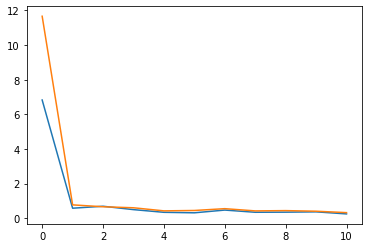

In [93]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])

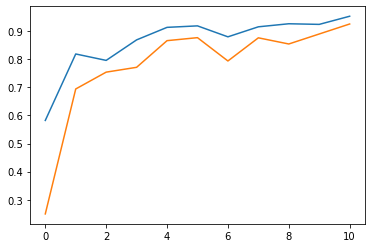

In [92]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])

## Visualising Results

In [102]:
import cv2 as cv

In [104]:
  from google.colab.patches import cv2_imshow

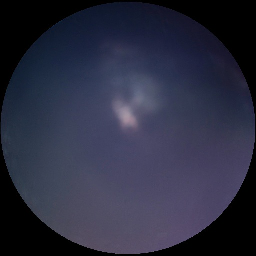

Label: 0


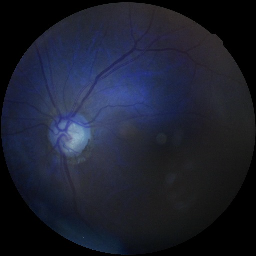

Label: 2


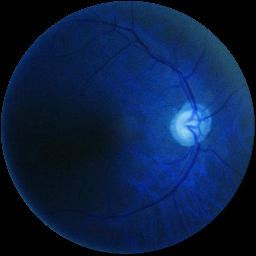

Label: 2


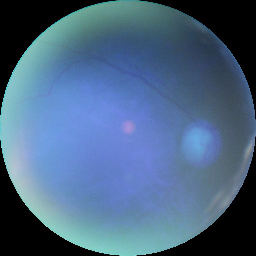

Label: 2


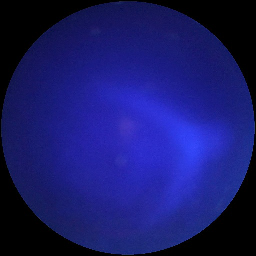

Label: 0


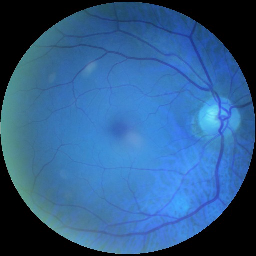

Label: 2


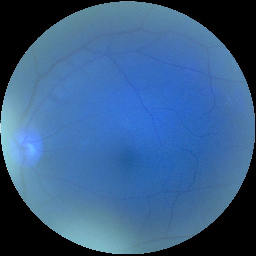

Label: 3


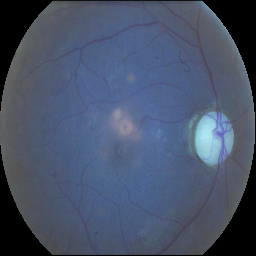

Label: 2


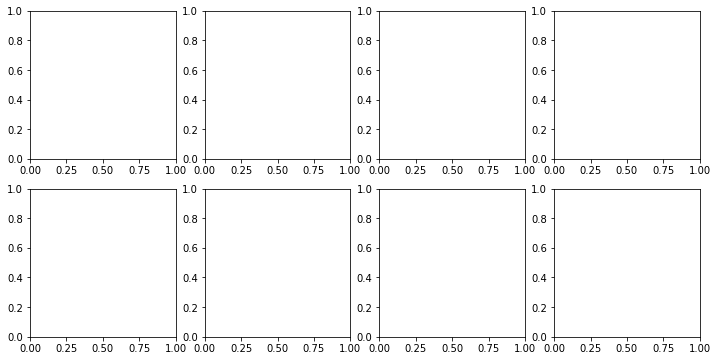

In [126]:
images, labels = next(val_ds)
batch_size=32
# Plot the images and their labels
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    cv2_imshow(images[i])
    print(f'Label: {np.argmax(labels[i])}')
